## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [14]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew


In [13]:

data = pd.read_csv("motorbike_ambulance_calls.csv")
print(data.head())

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


In [16]:
print(data.describe())
print(data.max())
print(data.min())
print(data.shape)

            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [17]:
print(data.dtypes)
print(data.count())

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [19]:
print(data.isna().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [20]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], errors='coerce', format='%m/%d/%y')
  return df

In [21]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  return first_day, last_day

print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

NameError: name 'first_day' is not defined

In [22]:
print(data.dtypes)

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [23]:
data_categorical = data.select_dtypes(include=['object', 'category'])

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [24]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    mapping = {
        'winter': 1,
        'spring': 2,
        'summer': 3,
        'autumn': 4
    }
    df[season_col_name] = df[season_col_name].map(mapping)
    return df

data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

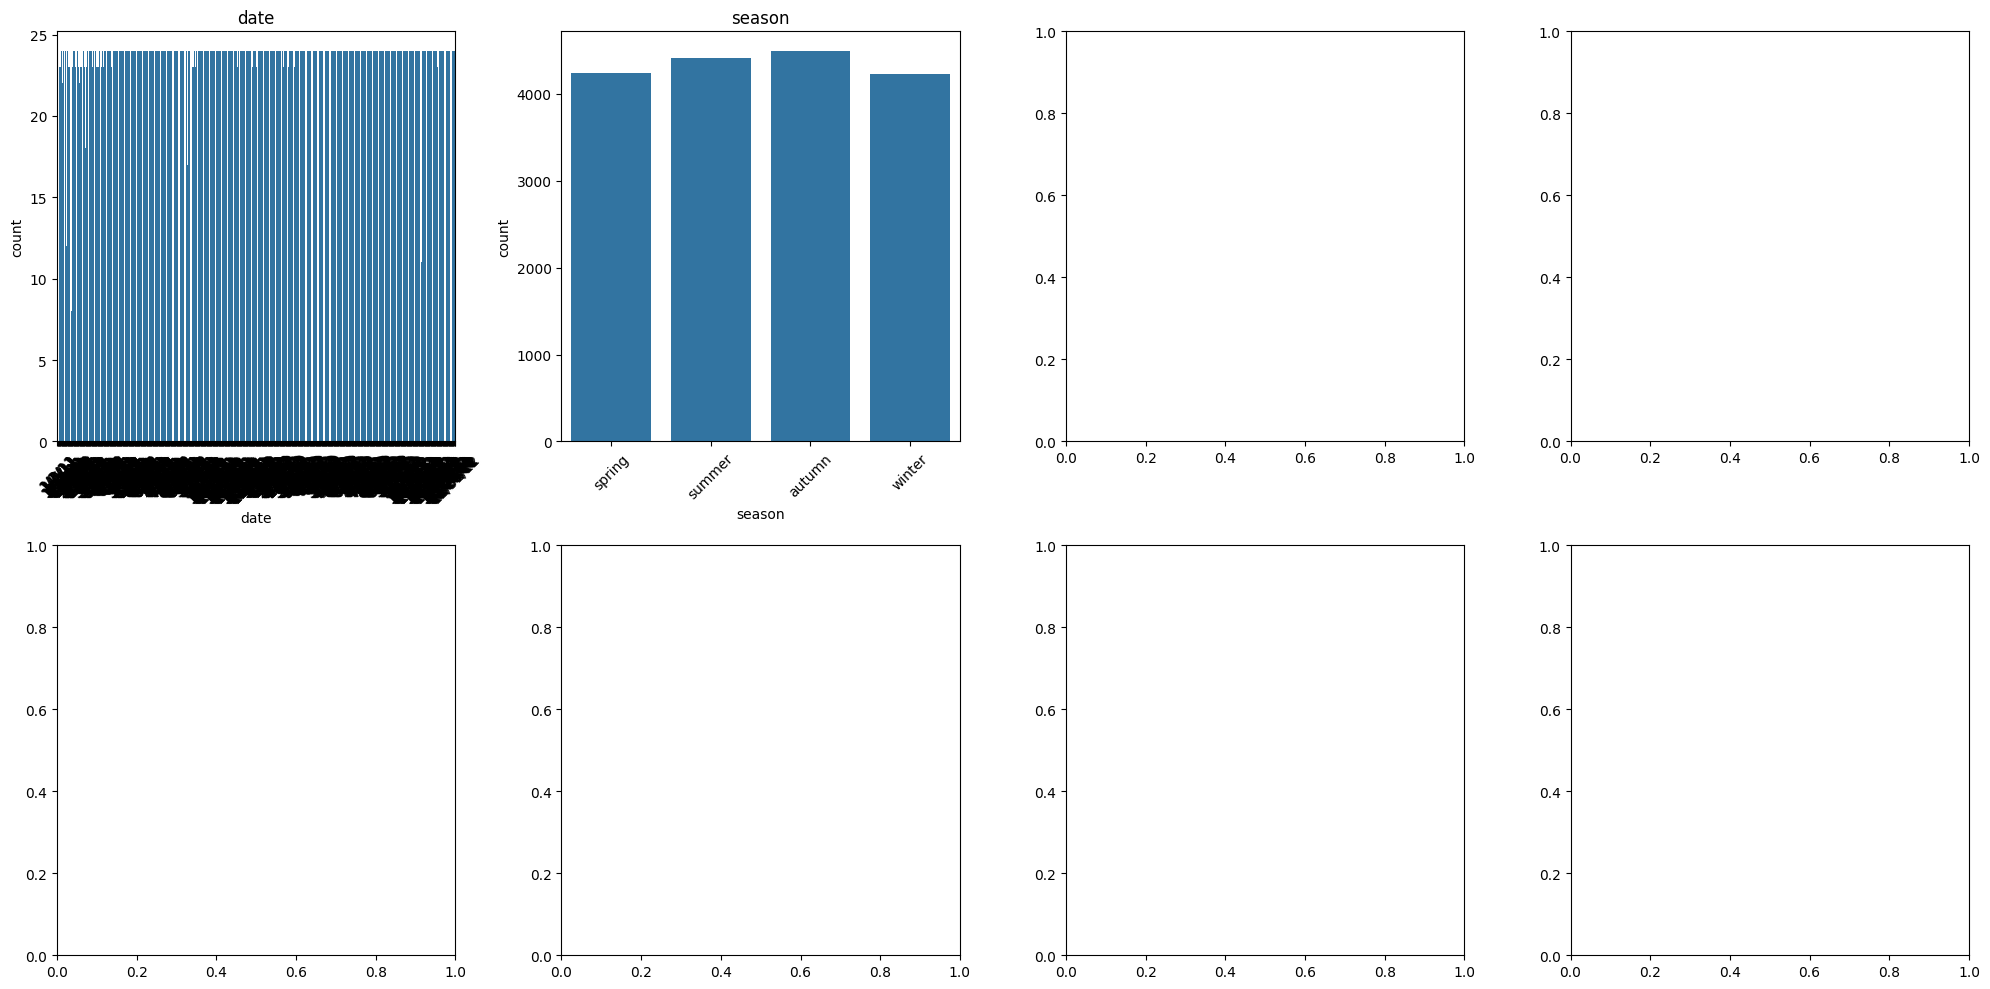

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17379 non-null  object
 1   season  17379 non-null  object
dtypes: object(2)
memory usage: 271.7+ KB
None
     date  season
0  1/1/11  spring
1  1/1/11  spring
2  1/1/11  spring
3  1/1/11  spring
4  1/1/11  spring


In [25]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=data_categorical[variable], ax=subplot)
    subplot.set_title(variable)
    subplot.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(data_categorical.info())
print(data_categorical.head())

**Висновки з 5-7 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [26]:
data_numerical = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

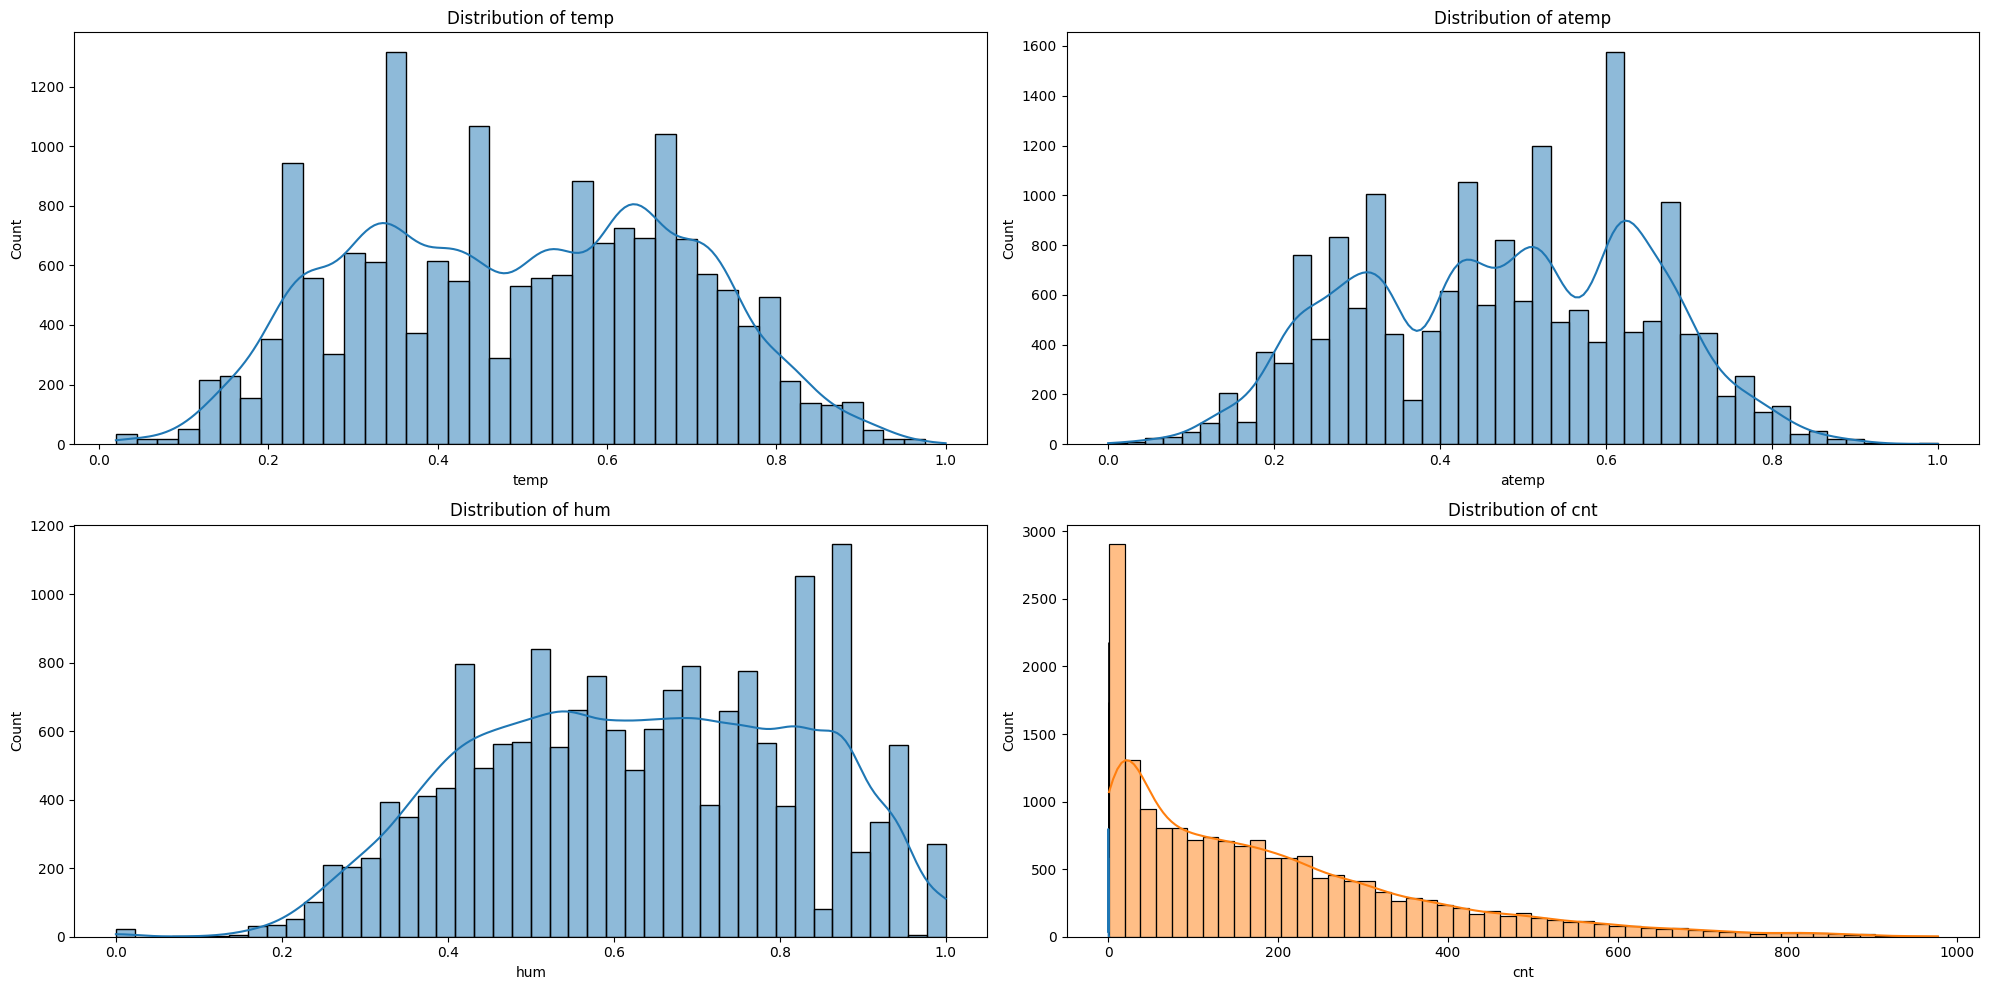

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for idx, column in enumerate(data_numerical.columns[:4]):
    row = idx // 2
    col = idx % 2
    sns.histplot(data=data_numerical, x=column, ax=ax[row, col], kde=True)
    ax[row, col].set_title(f'Distribution of {column}')
    ax[row, col].set_xlabel(column)
    ax[row, col].set_ylabel('Count')

if len(data_numerical.columns) > 4:
    sns.histplot(data=data_numerical, x=data_numerical.columns[4], ax=ax[1, 1], kde=True)
    ax[1, 1].set_title(f'Distribution of {data_numerical.columns[4]}')
    ax[1, 1].set_xlabel(data_numerical.columns[4])
    ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

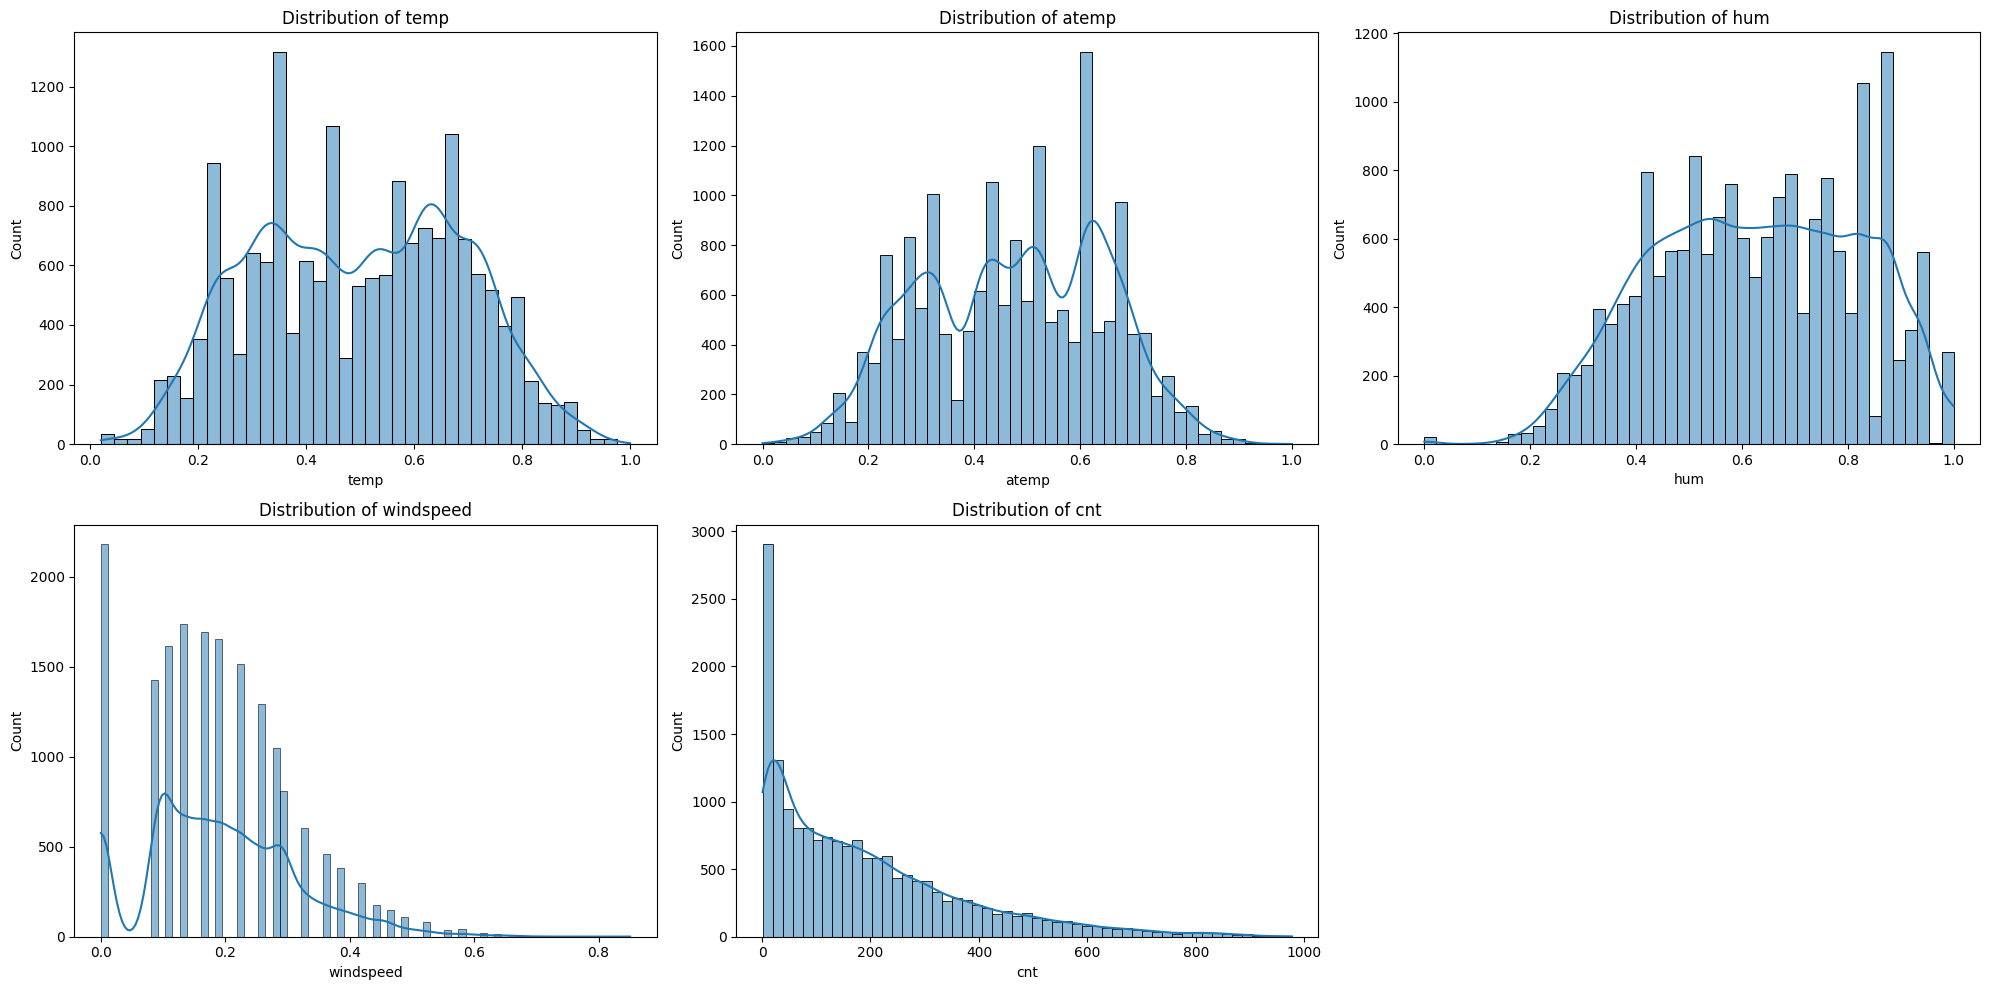

Коефіцієнти нахилу (skewness) для числових змінних:
temp: -0.0060
atemp: -0.0904
hum: -0.1113
windspeed: 0.5749
cnt: 1.2773


In [28]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

skewness_dict = {}

for idx, column in enumerate(data_numerical.columns):
    sns.histplot(data=data_numerical, x=column, ax=ax[idx], kde=True)
    ax[idx].set_title(f'Distribution of {column}')
    ax[idx].set_xlabel(column)
    ax[idx].set_ylabel('Count')

    skewness = skew(data_numerical[column].dropna())
    skewness_dict[column] = skewness

for idx in range(len(data_numerical.columns), len(ax)):
    ax[idx].axis('off')

plt.tight_layout()
plt.show()

print("Коефіцієнти нахилу (skewness) для числових змінних:")
for column, skewness in skewness_dict.items():
    print(f"{column}: {skewness:.4f}")

**Висновки з 8-10 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

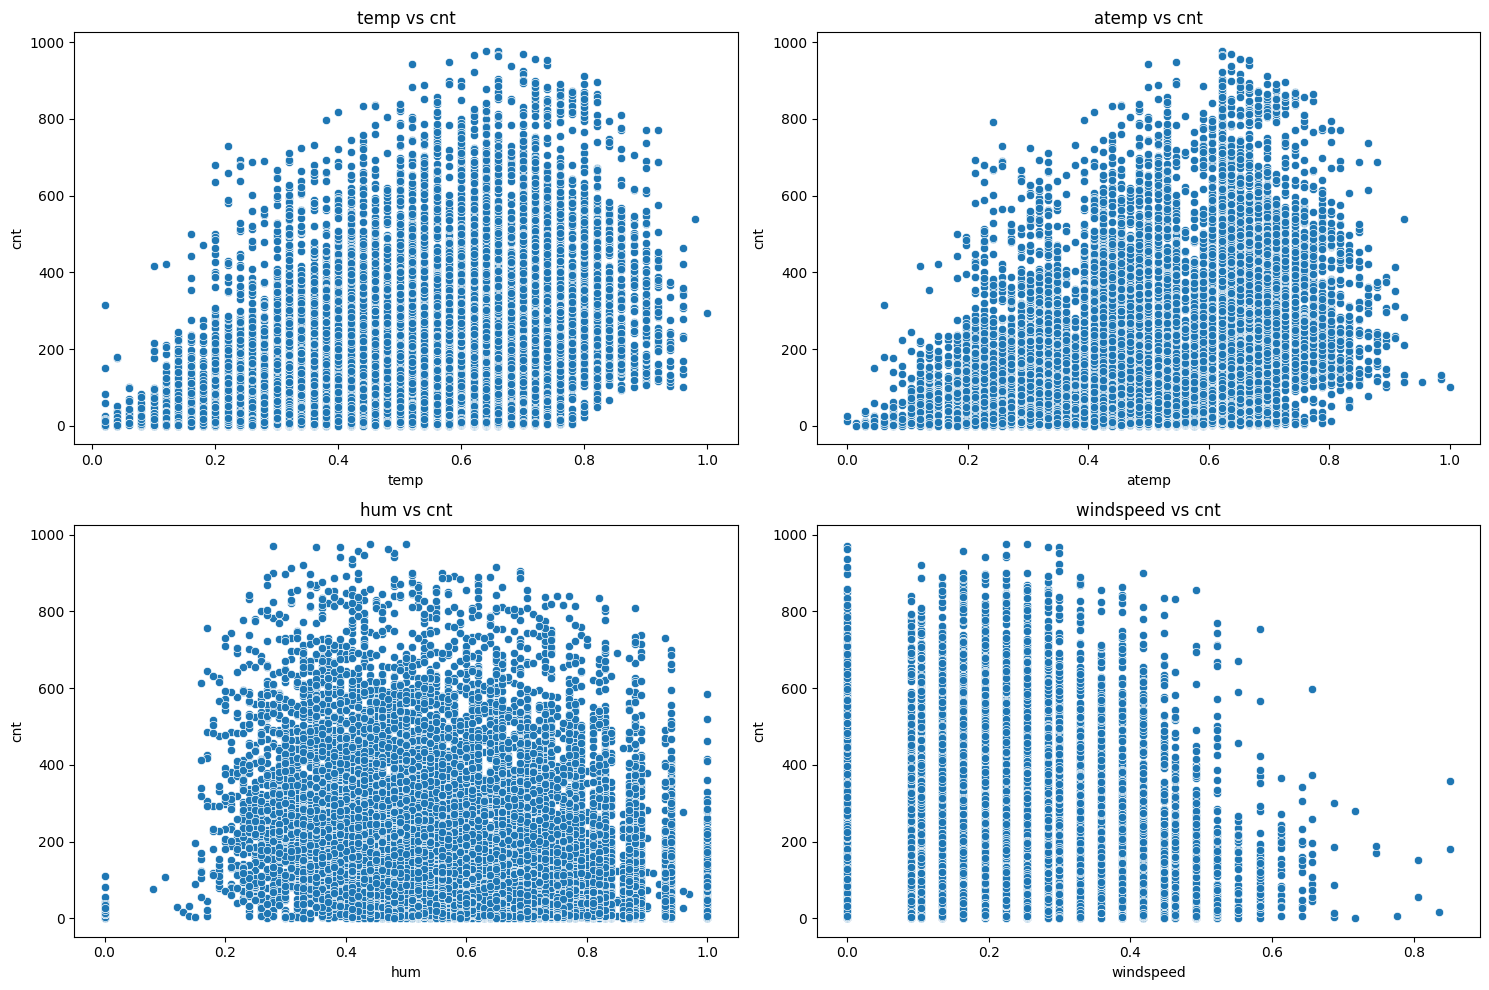

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
for var, subplot in zip(data_numerical.drop('cnt', axis=1).columns, ax):
    sns.scatterplot(data=data_numerical, x=var, y='cnt', ax=subplot)
    subplot.set_title(f'{var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

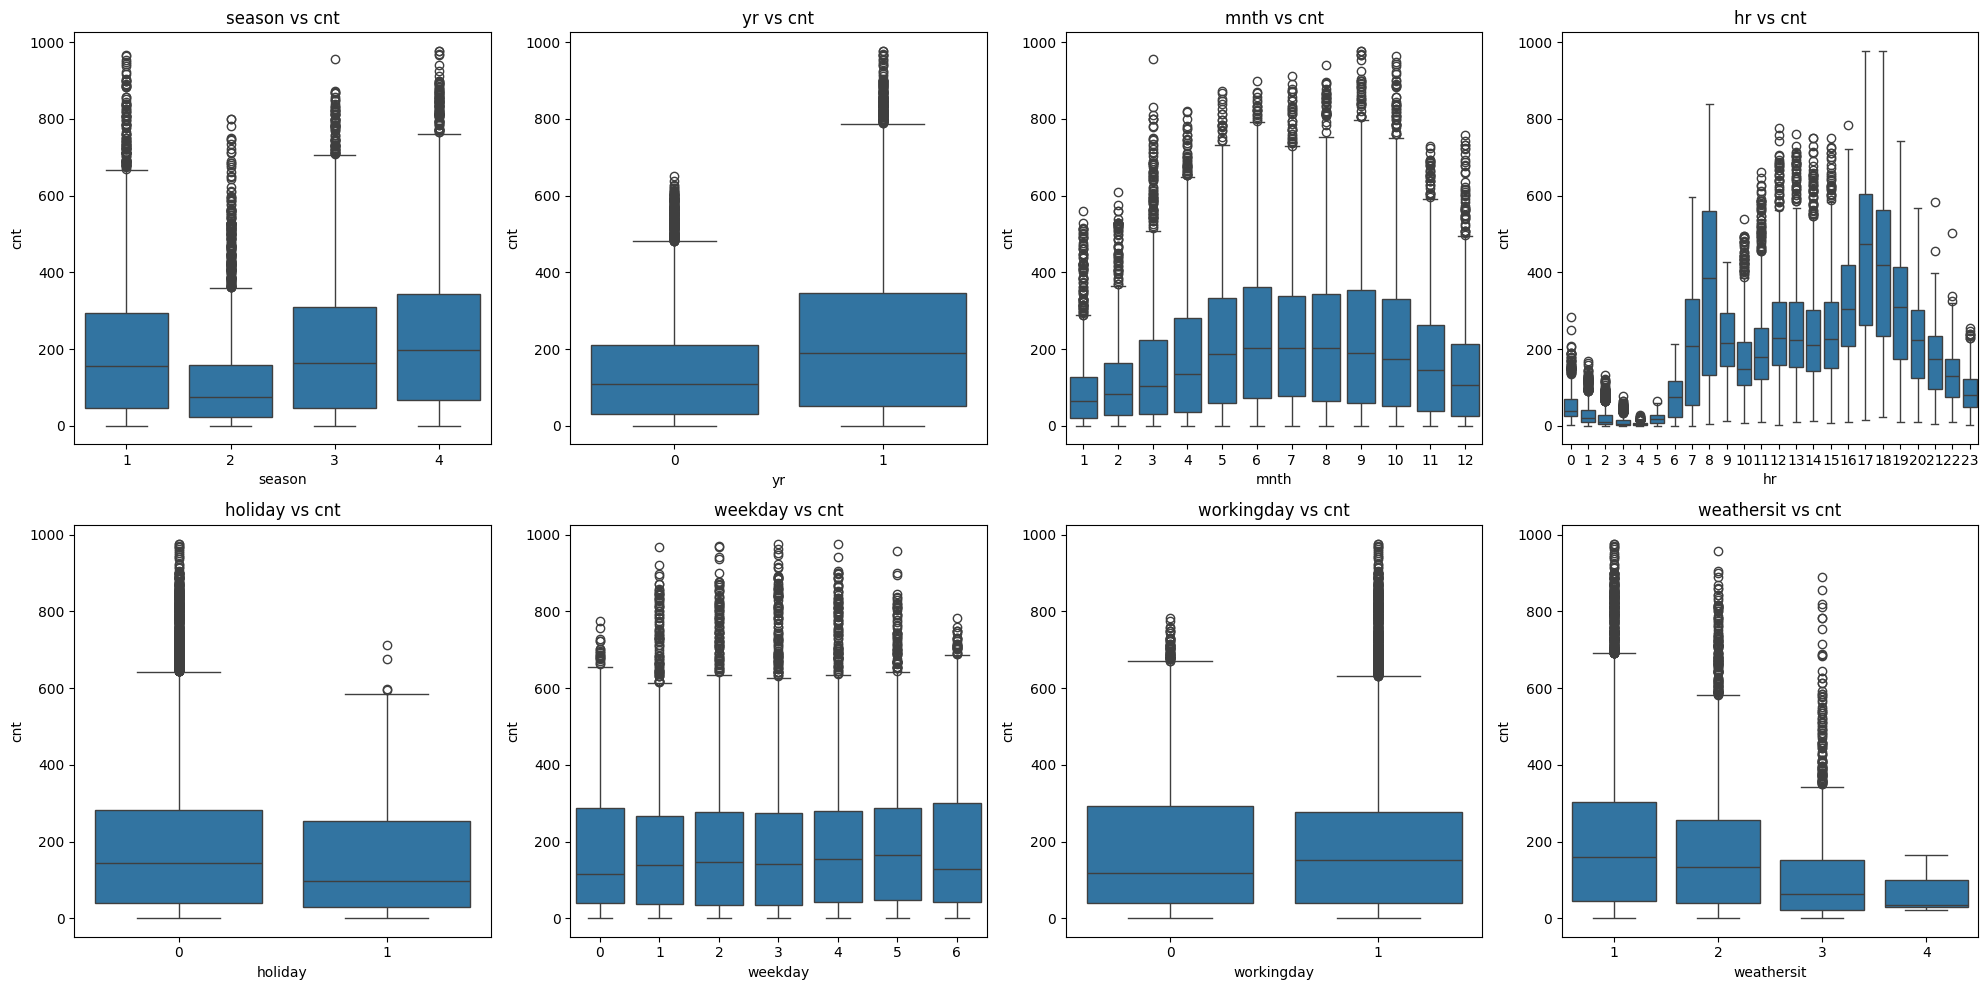

In [30]:
data['season'] = data['season'].fillna(0).astype('category')
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('category')
combined_data = pd.concat([data_categorical, data_numerical], axis=1)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical.columns, ax.flatten()):
    if combined_data[var].nunique() > 1:
        sns.boxplot(data=combined_data, x=var, y='cnt', ax=subplot)
        subplot.set_title(f'{var} vs cnt')
        subplot.set_xlabel(var)
        subplot.set_ylabel('cnt')
    else:
        subplot.text(0.5, 0.5, f"Only one value in {var}", ha='center', va='center')

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

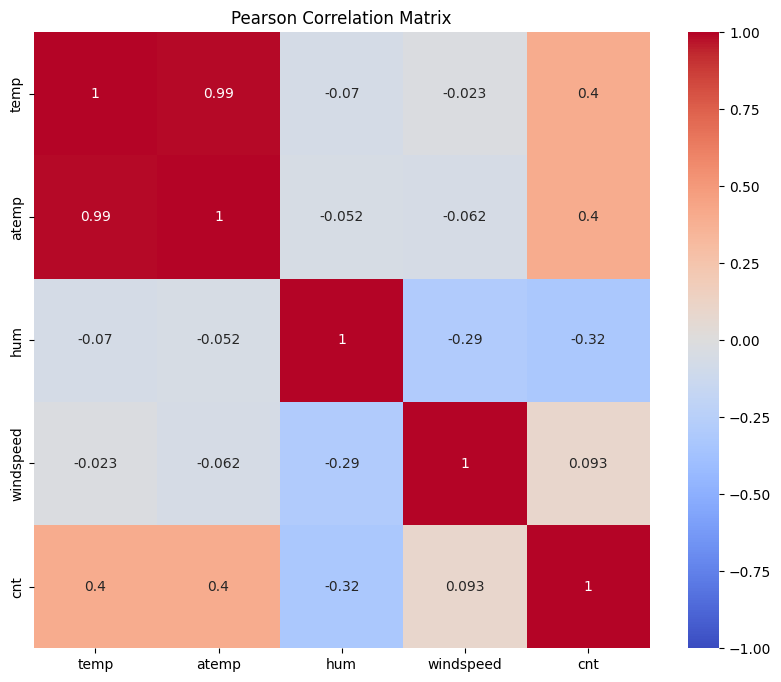

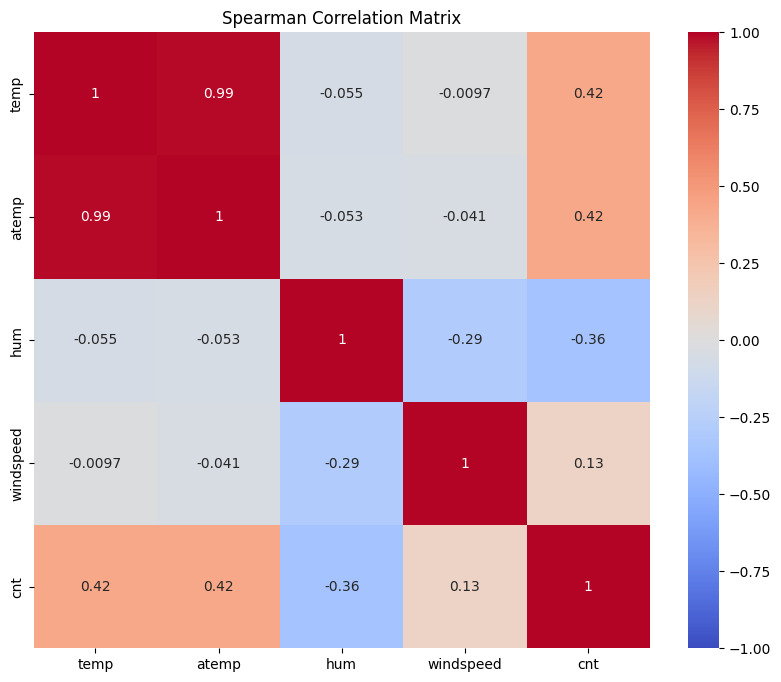

In [35]:

from scipy.stats import pearsonr, spearmanr
pearson_corr = data_numerical.corr(method='pearson')
spearman_corr = data_numerical.corr(method='spearman')

pearson_p_values = pd.DataFrame(index=data_numerical.columns, columns=data_numerical.columns)
for col1 in data_numerical.columns:
    for col2 in data_numerical.columns:
        pearson_p_values.loc[col1, col2] = pearsonr(data_numerical[col1], data_numerical[col2])[1]

spearman_p_values = pd.DataFrame(index=data_numerical.columns, columns=data_numerical.columns)
for col1 in data_numerical.columns:
    for col2 in data_numerical.columns:
        spearman_p_values.loc[col1, col2] = spearmanr(data_numerical[col1], data_numerical[col2])[1]

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

**Завдання 14**
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [36]:
def get_dummies(df: pd.DataFrame) -> pd.DataFrame:
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')
                         ], axis=1)

    features = features.drop(['season',
                             'mnth',
                             'weekday',
                             'weathersit'
                            ], axis = 1)

    return features

features = get_dummies(data)

In [37]:
features = get_dummies(data)

print(features)

       index      date  yr  hr  holiday  workingday  temp   atemp   hum  \
0          1    1/1/11   0   0        0           0  0.24  0.2879  0.81   
1          2    1/1/11   0   1        0           0  0.22  0.2727  0.80   
2          3    1/1/11   0   2        0           0  0.22  0.2727  0.80   
3          4    1/1/11   0   3        0           0  0.24  0.2879  0.75   
4          5    1/1/11   0   4        0           0  0.24  0.2879  0.75   
...      ...       ...  ..  ..      ...         ...   ...     ...   ...   
17374  17375  12/31/12   1  19        0           1  0.26  0.2576  0.60   
17375  17376  12/31/12   1  20        0           1  0.26  0.2576  0.60   
17376  17377  12/31/12   1  21        0           1  0.26  0.2576  0.60   
17377  17378  12/31/12   1  22        0           1  0.26  0.2727  0.56   
17378  17379  12/31/12   1  23        0           1  0.26  0.2727  0.65   

       windspeed  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0         0.0000  .

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [38]:
features['hr'] = data['hr']

features['night_hours'] = features['hr'].apply(lambda x: 1 if x in [0, 1, 2, 3, 4, 5, 22, 23] else 0)

features = features.drop('hr', axis=1)

print(features.columns)

Index(['index', 'date', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_1', 'season_2', 'season_3', 'season_4',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'night_hours'],
      dtype='object')


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [39]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'atemp', 'date'], axis=1, errors='ignore')

In [40]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [42]:
X_train, X_test, X_val, y_train, y_test, y_val = get_train_data(features_lr, 'cnt', 0.3)

In [43]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

X_train, X_test, X_val, y_train, y_test, y_val = get_train_data(features_lr, 'cnt', 0.3)
model = train_linear_model(X_train, y_train)

In [44]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15443.710
R^2 train: 0.525, test: 0.523


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

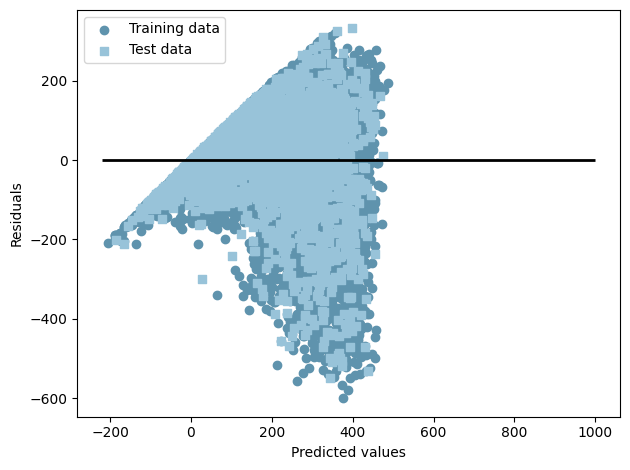

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, c="#5F93ad", marker='o', label="Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c="#98c3d9", marker='s', label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()
plt.show()

**Висновки з завдання (детальні)**



	1)Як виявляти залежності між змінними.
	2))Чим відрізняються методи Пірсона та Спірмана.
	3)Як уникати проблем мультиколінеарності при створенні моделі.
	4)Як грамотно поділити дані для побудови моделі машинного навчання.
